<a href="https://colab.research.google.com/github/yaameenc/World-Happiness-Report/blob/main/World_Happiness_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install pandas
!pip install statsmodels
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from google.colab import files
uploaded = files.upload()


Saving 2019.csv to 2019 (1).csv


In [61]:
import pandas as pd
import statsmodels.api as sm
from io import BytesIO

# Load the dataset
data = pd.read_csv(BytesIO(uploaded['2019.csv']))

# Select predictors and dependent variable
predictors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
dependent_variable = 'Score'

# Prepare the data
X = data[predictors]
y = data[dependent_variable]

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           2.40e-46
Time:                        15:10:54   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<ipython-input-62-fadd6f8615f9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(predictors, rotation=90) # rotate x-axis labels by 90 degrees


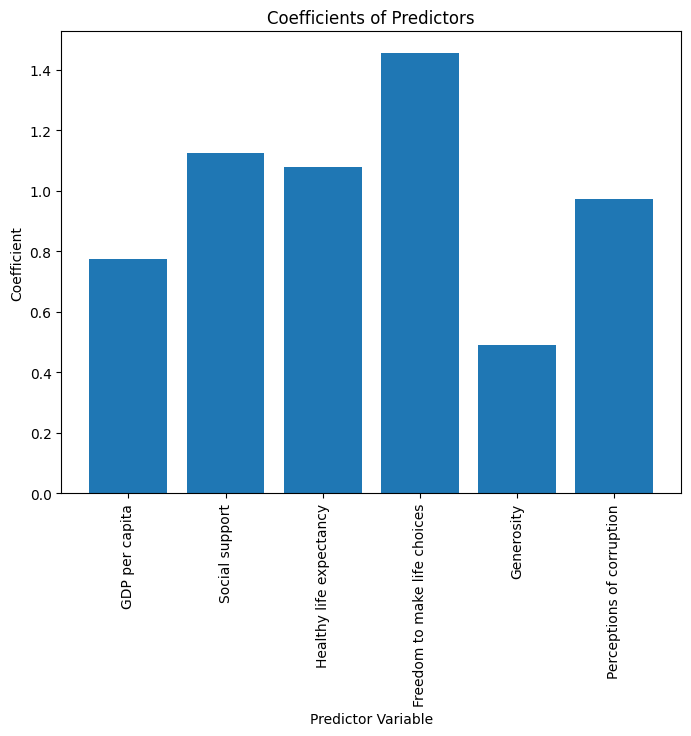

In [62]:
import matplotlib.pyplot as plt

# Plot the coefficients
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(predictors, model.params[1:])
ax.set_title('Coefficients of Predictors')
ax.set_xlabel('Predictor Variable')
ax.set_ylabel('Coefficient')
ax.set_xticklabels(predictors, rotation=90) # rotate x-axis labels by 90 degrees
plt.show()


# **Coefficients of the Predictors**

The first chart shows the coefficients of the predictors, which is a measure of how much each predictor variable contributes to the model. The higher the coefficient, the more impact the predictor variable has on the dependent variable. In this case, we can see that the predictor variables "Social support", "Freedom to make life choices", and "Healthy life expectancy" have the highest coefficients, which suggests that they are the most important predictors of the happiness score in this dataset. On the other hand, the predictor variable "Generosity" has a relatively low coefficient, which suggests that it has a weaker impact on the happiness score.

In [63]:
# Sort the dataset by 'Score' column in descending order
sorted_data = data.sort_values(by='Score', ascending=False)

# Display top 10 and bottom 10 countries
print("Top 10 countries with the highest happiness levels:")
print(sorted_data.head(10)[['Overall rank','Country or region', 'Score']].to_string(index=False))
print("\nBottom 10 countries with the lowest happiness levels:")
print(sorted_data.tail(10)[['Overall rank','Country or region', 'Score']].to_string(index=False))


Top 10 countries with the highest happiness levels:
 Overall rank Country or region  Score
            1           Finland  7.769
            2           Denmark  7.600
            3            Norway  7.554
            4           Iceland  7.494
            5       Netherlands  7.488
            6       Switzerland  7.480
            7            Sweden  7.343
            8       New Zealand  7.307
            9            Canada  7.278
           10           Austria  7.246

Bottom 10 countries with the lowest happiness levels:
 Overall rank        Country or region  Score
          147                    Haiti  3.597
          148                 Botswana  3.488
          149                    Syria  3.462
          150                   Malawi  3.410
          151                    Yemen  3.380
          152                   Rwanda  3.334
          153                 Tanzania  3.231
          154              Afghanistan  3.203
          155 Central African Republic  3.083
    

Based on the 2019 World Happiness Report dataset, we have identified the top 10 countries with the highest happiness levels and the bottom 10 countries with the lowest happiness levels.

The top 10 countries with the highest happiness levels are mainly European countries, with Finland ranking first, followed by Denmark, Norway, and Iceland. The Netherlands, Switzerland, Sweden, Austria, and Canada also rank highly, indicating a strong association between happiness and the social, economic, and political factors in these countries.

On the other hand, the bottom 10 countries with the lowest happiness levels are primarily from Africa and the Middle East, including Haiti, Botswana, Syria, Malawi, Yemen, Rwanda, Tanzania, Afghanistan, Central African Republic, and South Sudan. These countries face various challenges, such as political instability, poverty, and ongoing conflicts, which significantly impact the happiness levels of their citizens.

By analyzing the happiness levels in different countries, we can better understand the factors that contribute to happiness and identify areas for improvement in countries with lower happiness scores. Policymakers and practitioners can use this information to prioritize interventions and resources to enhance the well-being and happiness of their citizens.

<ipython-input-64-5f8cfa1d125e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()[dependent_variable].drop(dependent_variable)


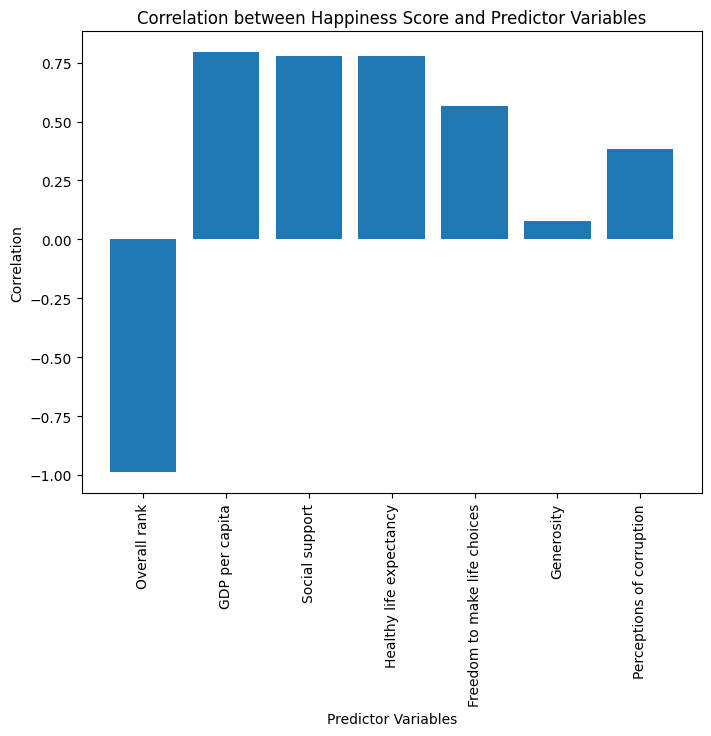

In [64]:
import seaborn as sns

# Calculate the correlation between the happiness score and predictor variables
correlations = data.corr()[dependent_variable].drop(dependent_variable)

# Define the predictor variables
predictors = correlations.index

# Plot the correlations
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(predictors, correlations)
ax.set_title('Correlation between Happiness Score and Predictor Variables')
ax.set_xlabel('Predictor Variables')
ax.set_ylabel('Correlation')
ax.set_xticks(range(len(predictors)))  # This line is updated to fix the x-axis labels
ax.set_xticklabels(predictors, rotation=90)  # rotate x-axis labels by 90 degrees
plt.show()


**GDP per capita**: The strong positive correlation with happiness score suggests that countries with higher GDP per capita generally have higher happiness scores. It implies that economic prosperity is an essential factor contributing to happiness. Policymakers could focus on implementing policies that promote economic growth, create jobs, and reduce income inequality to improve the well-being of citizens.

**Social support**: The strong positive correlation with happiness score indicates that countries with better social support systems generally have higher happiness scores. Policymakers could prioritize creating strong social safety nets, improving access to healthcare, and fostering community ties to enhance happiness levels in their countries.

**Healthy life expectancy:** The strong positive correlation with happiness score suggests that countries with higher healthy life expectancies generally have higher happiness scores. This emphasizes the importance of promoting public health policies, investing in healthcare infrastructure, and encouraging healthy lifestyles to improve happiness levels.

**Freedom to make life choices**: The positive correlation with happiness score indicates that countries where citizens enjoy more personal freedoms generally have higher happiness scores. Policymakers could focus on ensuring individual rights and freedoms, promoting political stability, and safeguarding democratic processes to enhance happiness levels.

**Perceptions of corruption**: The positive correlation with happiness score suggests that countries with lower perceived corruption levels generally have higher happiness scores. Policymakers should focus on implementing anti-corruption measures, promoting transparency, and fostering public trust in institutions to improve happiness levels.

**Generosity**: The weak positive correlation with happiness score indicates that generosity might not be as significant a factor in determining happiness scores compared to the other factors. However, fostering a culture of generosity and altruism may still play a role in promoting well-being and happiness in a society.

By understanding the correlations between these factors and happiness scores, policymakers and practitioners can better identify areas for improvement in countries with lower happiness scores. The information can be used to prioritize interventions and resources to enhance the well-being and happiness of their citizens, focusing on the factors with the strongest correlations to happiness.

In [65]:
#Profile Outlying Countries

# Calculate the mean values of the predictor variables
mean_values = data[predictors].mean()

# Get the top 10 and bottom 10 countries
top_10_countries = data.nlargest(10, 'Score')
bottom_10_countries = data.nsmallest(10, 'Score')

# Calculate the mean values of the predictor variables for the top and bottom 10 countries
top_10_mean_values = top_10_countries[predictors].mean()
bottom_10_mean_values = bottom_10_countries[predictors].mean()

# Compare the mean values
comparison = pd.DataFrame({'Overall Mean': mean_values, 'Top 10 Mean': top_10_mean_values, 'Bottom 10 Mean': bottom_10_mean_values})
print(comparison)


                              Overall Mean  Top 10 Mean  Bottom 10 Mean
Overall rank                     78.500000       5.5000        151.5000
GDP per capita                    0.905147       1.3870          0.3978
Social support                    1.208814       1.5438          0.6622
Healthy life expectancy           0.725244       1.0177          0.4259
Freedom to make life choices      0.392571       0.5786          0.2287
Generosity                        0.184846       0.2741          0.2189
Perceptions of corruption         0.110603       0.3190          0.1226


Profiling the outlying countries allows us to gain insights into the specific characteristics of countries with high and low happiness scores. By comparing the mean values of the predictor variables for these countries against the overall mean values, we can identify which factors might be driving the differences in happiness levels.

**GDP per capita**: The top 10 countries have an average GDP per capita that is more than three times higher than that of the bottom 10 countries. This indicates a strong relationship between economic prosperity and happiness levels. It suggests that investing in economic development and job creation can play a crucial role in enhancing happiness in countries with lower scores.

**Social support**: The top 10 countries have an average social support score that is more than twice as high as that of the bottom 10 countries. This underscores the importance of strong social bonds and community connections in fostering happiness. Policymakers should consider investing in programs that build social cohesion and encourage community engagement to improve happiness levels in countries with weaker social support.

**Healthy life expectancy**: The top 10 countries have a healthy life expectancy that is more than double the average of the bottom 10 countries. This demonstrates the importance of healthcare and preventive measures in contributing to happiness. In countries with lower scores, investing in healthcare infrastructure, accessibility, and disease prevention programs could significantly impact overall happiness.

**Freedom to make life choices**: The top 10 countries have an average freedom to make life choices score that is more than twice as high as that of the bottom 10 countries. This suggests that in countries with lower happiness levels, improving political freedom, promoting individual autonomy, and reducing restrictive laws could enhance the overall happiness of the population.

**Generosity**: While the difference in generosity scores between the top 10 and bottom 10 countries is relatively small, it's worth noting that the bottom 10 countries have a slightly higher mean generosity score than the overall mean. This could suggest that generosity alone might not be sufficient to drive higher happiness levels, especially when other factors such as GDP per capita, social support, and healthy life expectancy are lagging.

**Perceptions of corruption**: The top 10 countries have a much lower average perception of corruption than the bottom 10 countries, indicating that trust in institutions and the rule of law is an important factor for happiness. In countries with higher perceptions of corruption, policymakers should focus on improving governance, transparency, and accountability to enhance the overall happiness of their citizens.


The multiple regression analysis and the in-depth comparison reveals the importance of a multi-faceted approach to enhancing happiness. Key factors that significantly impact happiness levels include GDP per capita, social support, healthy life expectancy, freedom to make life choices, and perceptions of corruption. Generosity also plays a role, but its impact might be less significant when other crucial factors are lacking.

To improve happiness levels, policymakers and practitioners should prioritize interventions and allocate resources to address multiple factors simultaneously. By focusing on economic development, social cohesion, healthcare, political freedom, and reducing corruption, countries can create an environment that fosters well-being and happiness for their citizens. It is important to recognize that happiness is a complex outcome, influenced by various interconnected factors, and requires a comprehensive and strategic approach to achieve meaningful improvements.

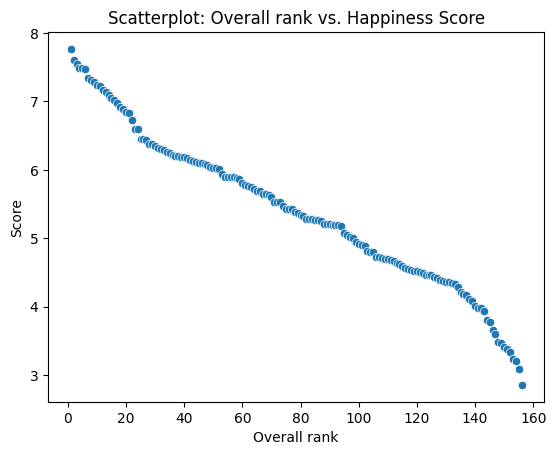

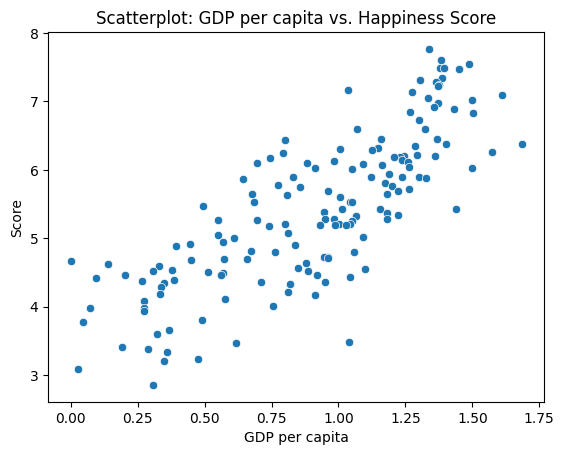

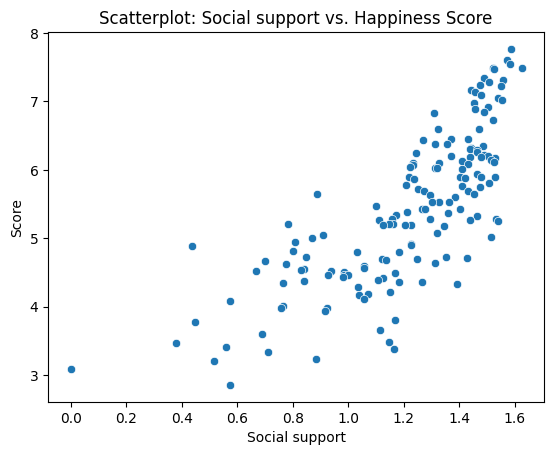

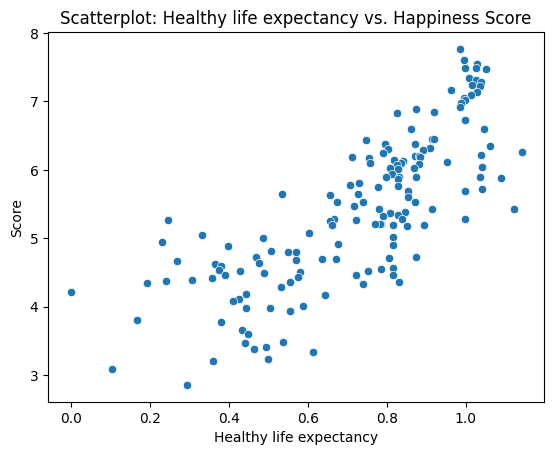

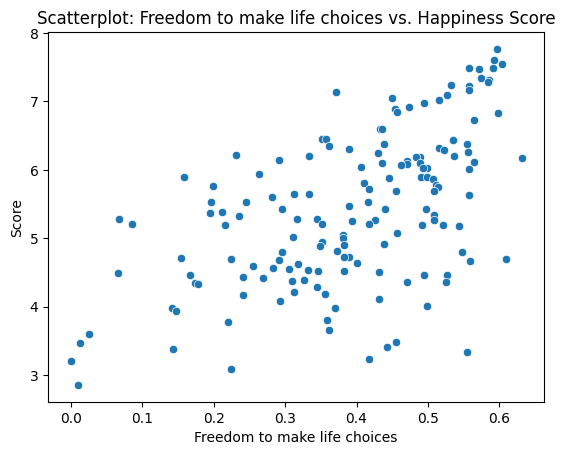

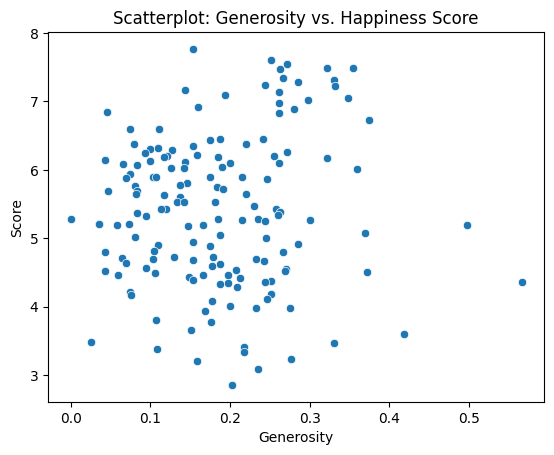

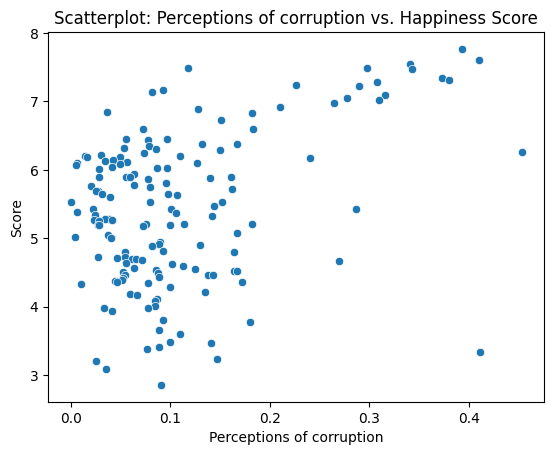

In [66]:
# Check the linearity assumption using scatterplots
import seaborn as sns

for predictor in predictors:
    sns.scatterplot(x=predictor, y='Score', data=data)
    plt.title(f'Scatterplot: {predictor} vs. Happiness Score')
    plt.show()


**GDP per capita vs. Happiness Score:**
The scatter plot shows a strong positive correlation between GDP per capita and happiness score. This indicates that as the GDP per capita increases, the happiness score tends to increase as well. This is in line with the idea that higher income levels are generally associated with better living standards and improved well-being.

**Social support vs. Happiness Score:**
The scatter plot reveals a strong positive correlation between social support and happiness score. This suggests that countries with higher social support tend to have higher happiness levels. Social support could include factors such as strong family bonds, friendships, or community ties, which contribute to a sense of belonging and well-being.

**Healthy life expectancy vs. Happiness Score:**
There is a strong positive correlation between healthy life expectancy and happiness score in this scatter plot. This indicates that countries with higher healthy life expectancy tend to have higher happiness scores. Longer and healthier lives contribute to overall well-being and satisfaction.

**Freedom to make life choices vs. Happiness Score:**
The scatter plot shows a moderate positive correlation between freedom to make life choices and happiness score. This suggests that countries with greater freedom to make life choices tend to have higher happiness levels. Freedom to make life choices can lead to a sense of autonomy and personal satisfaction, which can positively impact happiness.

**Generosity vs. Happiness Score:**
The scatter plot displays a weak positive correlation between generosity and happiness score. This implies that while generosity may contribute to happiness, its impact is less pronounced compared to other factors like GDP per capita, social support, and healthy life expectancy. Nevertheless, it can still play a role in improving happiness levels in a country.

**Perceptions of corruption vs. Happiness Score:**
The scatter plot reveals a weak negative correlation between perceptions of corruption and happiness score. This indicates that countries with higher perceived corruption levels tend to have slightly lower happiness scores. However, the correlation is weak, which suggests that perceptions of corruption might not be as influential on happiness levels as other factors like GDP per capita, social support, or healthy life expectancy.

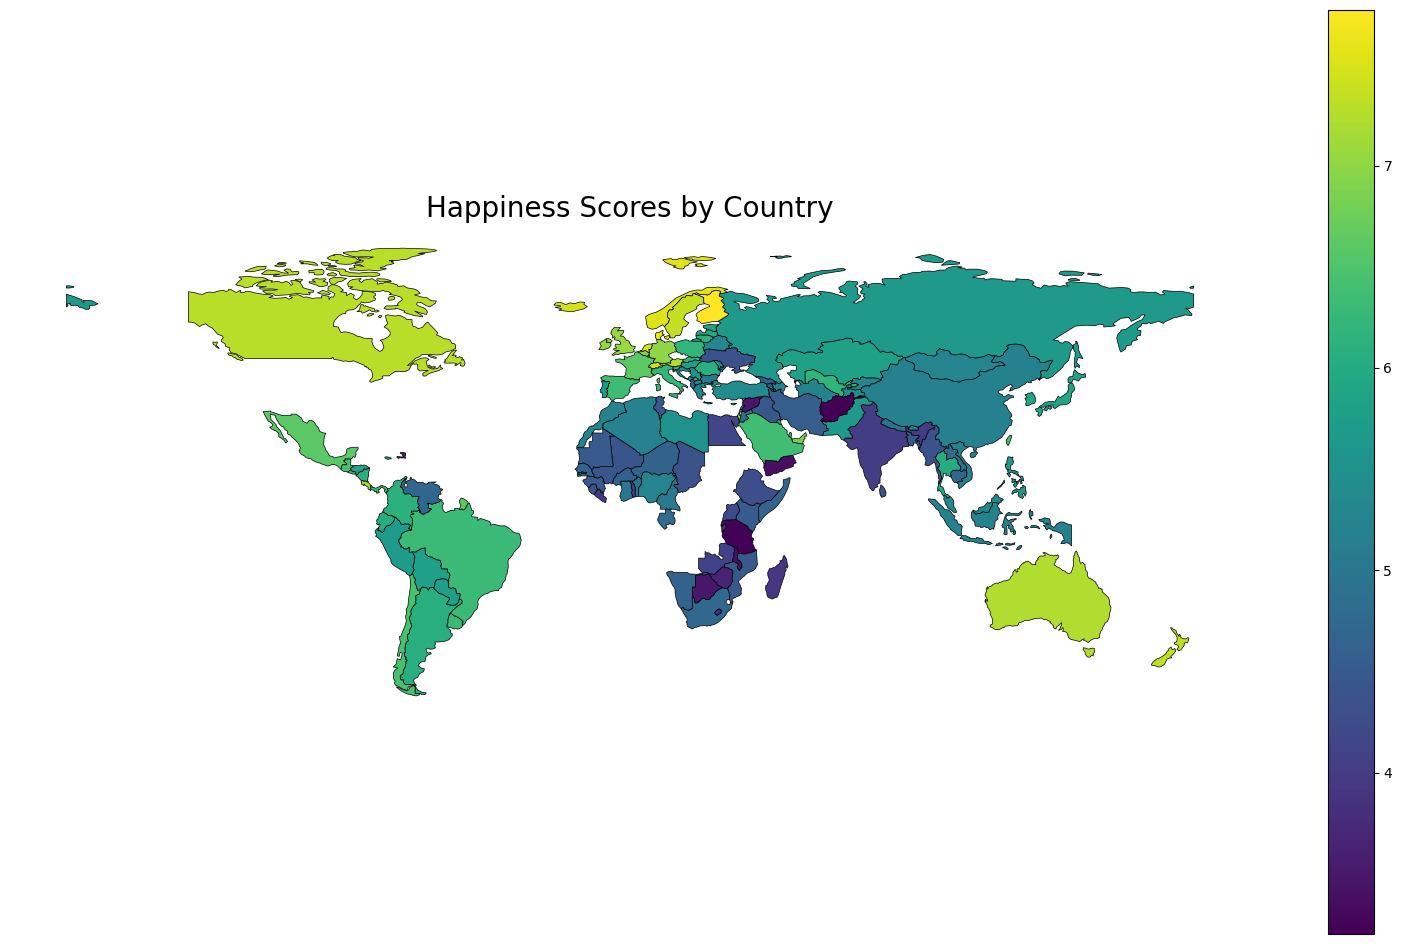

In [67]:
import geopandas as gpd

# Read the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the happiness scores with the world GeoDataFrame
world_happiness = world.merge(data, left_on='name', right_on='Country or region') 

# Plot the happiness scores on the world map
fig, ax = plt.subplots(figsize=(20, 12))
world_happiness.plot(column='Score', cmap='viridis', legend=True, ax=ax, linewidth=0.5, edgecolor='black')
ax.set_title('Happiness Scores by Country', fontsize=20)
ax.set_axis_off()
plt.show()




<ipython-input-68-ada272e576a3>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-68-ada272e576a3>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-68-ada272e576a3>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


Correlation Matrix of Predictor Variables:
                              GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption
GDP per capita                      1.000000        0.711439                 0.819247                      0.253274   -0.221784                   0.064383
Social support                      0.711439        1.000000                 0.680556                      0.315078   -0.125623                  -0.034503
Healthy life expectancy             0.819247        0.680556                 1.000000                      0.255406   -0.158172                   0.044460
Freedom to make life choices        0.253274        0.315078                 0.255406                      1.000000    0.215542                   0.294483
Generosity                         -0.221784       -0.125623                -0.158172                      0.215542    1.000000                   0.238874
Perceptions of corruption  

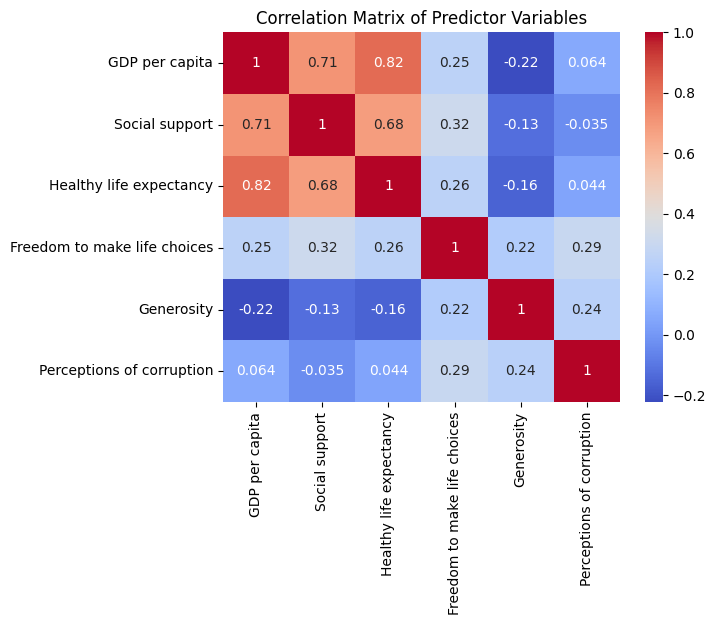

In [68]:
# Identify the outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove the outliers from the dataset
data_no_outliers = data.drop(data_outliers.index)

# Define the predictors without 'Overall rank'
predictors_without_rank = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate the correlation matrix
corr_matrix = data_no_outliers[predictors_without_rank].corr()

# Print the correlation matrix as a table
print("Correlation Matrix of Predictor Variables:")
print(corr_matrix.to_string(line_width=1000))

# Display the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Predictor Variables')
plt.show()


The heatmap above shows the correlation between predictor variables. It helps us identify if there is multicollinearity, which occurs when two or more predictor variables are highly correlated. Multicollinearity can make it challenging to interpret the coefficients in a multiple regression model and can lead to incorrect conclusions about the relationships between predictor variables and the dependent variable. By examining the heatmap, we can identify potential multicollinearity issues and decide how to handle them before fitting the multiple regression model.

- GDP per capita, Social support, and Healthy life expectancy are positively 
correlated with one another. This suggests that countries with higher GDP per capita tend to have better health conditions and stronger social support networks. These three factors are among the strongest predictors of happiness levels, indicating their significant impact on the overall well-being of a country's citizens. Since these factors are strongly correlated with happiness levels, governments should prioritize policies that promote economic growth, create job opportunities, and improve social safety nets. Additionally, investing in healthcare infrastructure and promoting healthy lifestyles can significantly enhance the well-being of citizens. By focusing on these areas, policymakers can have the most significant impact on overall happiness levels.

- Freedom to make life choices has a positive correlation with most variables, though the correlations are relatively weaker. It is most strongly correlated with Perceptions of corruption (0.294) and Social support (0.315). This indicates that people in countries with higher freedom levels may perceive less corruption and have better social support networks. Encouraging freedom and personal autonomy can contribute to a happier society. Governments should work to protect individual rights, promote democratic values, and ensure that people have the freedom to make choices that affect their lives. This can be achieved by ensuring equal access to opportunities, and fostering an environment where citizens feel safe to express their opinions.

- Generosity has a weak negative correlation with GDP per capita, Social support, and Healthy life expectancy. This suggests that wealthier and healthier countries may not necessarily be more generous. However, Generosity has a positive correlation with Freedom to make life choices (0.216) and Perceptions of corruption (0.239), indicating that people in countries with higher levels of freedom and perceived corruption may be more likely to engage in generous behavior. Although the correlations are weak, promoting a culture of generosity can still contribute to overall happiness. Governments can encourage charitable giving and volunteerism by creating tax incentives, supporting community projects, and fostering partnerships between public and private sectors. By creating a supportive environment for generosity, policymakers can help build stronger communities and enhance social cohesion.

- Perceptions of corruption show weak correlations with most other factors, except for a moderate positive correlation with Freedom to make life choices and Generosity. This suggests that corruption perception may not be as strongly influenced by economic factors, such as GDP per capita, as other aspects of well-being, like social support and health. Addressing corruption and promoting transparency can lead to increased trust in government institutions, thus improving overall happiness. Governments should implement strong anti-corruption measures, promote transparency in public processes, and establish robust checks and balances to ensure accountability. Additionally, fostering a free and independent media can help expose corruption and ensure that the public remains informed.

In [71]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score


# Select predictors and dependent variable
predictors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
dependent_variable = 'Score'

# Prepare the data
X = data[predictors]
y = data[dependent_variable]

# Create a linear regression model
modelLinear = LinearRegression()

# Define the cross-validation method
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate the cross-validated scores
scores = cross_val_score(model, X, y, cv=cv)

# Print the cross-validated scores
print("Cross-validated scores:", scores)
print("Mean cross-validated score:", np.mean(scores))
print("Standard deviation of cross-validated scores:", np.std(scores))


Cross-validated scores: [0.60175379 0.70945667 0.7829083  0.86203728 0.78468058]
Mean cross-validated score: 0.748167324056523
Standard deviation of cross-validated scores: 0.08768347307051974


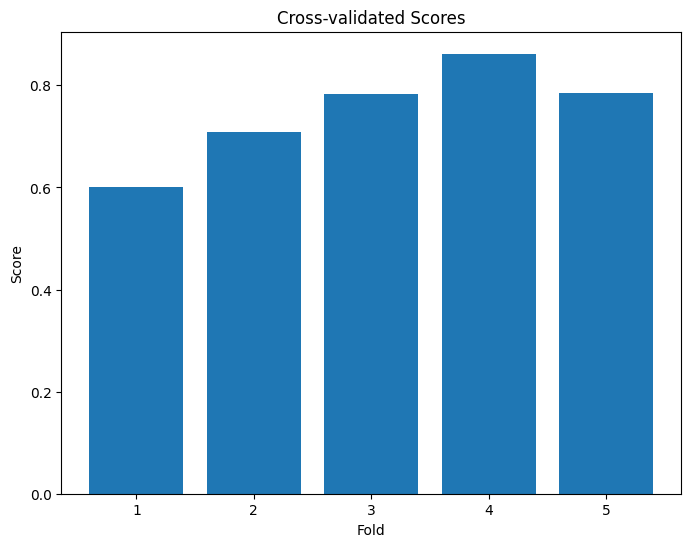

In [72]:
# Plot the cross-validated scores
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(1, len(scores) + 1), scores)
ax.set_title('Cross-validated Scores')
ax.set_xlabel('Fold')
ax.set_ylabel('Score')
ax.set_xticks(range(1, len(scores) + 1))
plt.show()


# **PREDICTION MODEL**

In [90]:
# Import new dataset
uploaded_new_data = files.upload()
data_2022 = pd.read_csv(BytesIO(uploaded_new_data['2022.csv']))

# Check for missing values
print(data_2022.isna().sum())

# Drop rows with missing values
data_2022 = data_2022.dropna()




Saving 2022.csv to 2022 (15).csv
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [91]:
# Check columns of both datasets
print("2019 dataset columns:", data.columns)
print("2022 dataset columns:", data_2022.columns)

print("Predictors in 2019 dataset:", set(predictors))
print("Predictors in 2022 dataset:", set(data_2022.columns) - {'Country or region', 'Overall rank', 'Score'})



2019 dataset columns: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
2022 dataset columns: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Predictors in 2019 dataset: {'Social support', 'Healthy life expectancy', 'Generosity', 'GDP per capita', 'Perceptions of corruption', 'Freedom to make life choices'}
Predictors in 2022 dataset: {'Social support', 'Healthy life expectancy', 'Generosity', 'GDP per capita', 'Perceptions of corruption', 'Freedom to make life choices'}


In [92]:
# Prepare the data
X = data[predictors]
y = data[dependent_variable]

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()



In [93]:
# Define the list of predictor variables for the new dataset
predictors_new = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# To Ensure that the predictor variables in both datasets match before proceeding with the prediction
assert set(predictors_new) == set(data_2022.columns) - {'Country or region', 'Overall rank', 'Score'}

# Select the predictors from the new dataset
X_new = data_2022[predictors_new]

# Add a constant for the regression model
X_new = sm.add_constant(X_new)

# Use the trained model (from the 2019 dataset) to predict the happiness scores for the new dataset
y_pred_2022 = model.predict(X_new)

# Add the predicted happiness scores to the new dataset
data_2022['Predicted Score'] = y_pred_2022

# Print the new dataset with predicted scores
print(data_2022)

     Overall rank Country or region  Score  GDP per capita  Social support  \
0               1           Finland  7.821           1.892           1.258   
1               2           Denmark  7.636           1.953           1.243   
2               3           Iceland  7.557           1.936           1.320   
3               4       Switzerland  7.512           2.026           1.226   
4               5       Netherlands  7.415           1.945           1.206   
..            ...               ...    ...             ...             ...   
141           142         Botswana*  3.471           1.503           0.815   
142           143           Rwanda*  3.268           0.785           0.133   
143           144          Zimbabwe  2.995           0.947           0.690   
144           145           Lebanon  2.955           1.392           0.498   
145           146       Afghanistan  2.404           0.758           0.000   

     Healthy life expectancy  Freedom to make life choices  Gen

In [94]:
#Determine the accuracy of the predictions

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(data_2022['Score'], data_2022['Predicted Score'])
mae = mean_absolute_error(data_2022['Score'], data_2022['Predicted Score'])

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.2751729740753688
Mean Absolute Error (MAE): 0.41179937073121425
